In [21]:
import mantel
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.offsetbox

In [27]:
results_folder = r'../example/results/mantel'
stations_parquet_file = r'stations_with_stats.parquet'

if not os.path.exists(results_folder):
    os.mkdir(results_folder)

df = pd.read_parquet(stations_parquet_file)

In [4]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Possible columns to use with cluster
# 'StationId', 'Name', 'Latitude', 'Longitude', 'Elevation', 'Series Start', 'Series end', 
# 'Min day IR', 'Max day IR', 'Yearly rainfall', 'Number of days with rainfall over 0.2 mm'

df_values = df[['Latitude', 'Longitude', 'Elevation', 'Yearly rainfall', 'Number of days with rainfall over 0.2 mm']]
c_dist = pdist(df_values)
mantel_list = list()
for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df_values)
    #df[str(n_clusters)] = cluster_labels

    cluster_2d = [[x] for x in cluster_labels ]

    mantel_avg = mantel.test(c_dist, pdist(cluster_2d), perms=10000, method='pearson')
    mantel_list.append([n_clusters, mantel_avg.r])
    
    print(
        "For n_clusters =",
        n_clusters,
        "The average mantel_score for all columns is :",
        mantel_avg.r,
    )
df_mantel = pd.DataFrame(mantel_list, columns =['Num_clusters', 'mantel'])
df_mantel.to_excel(os.path.join(results_folder, 'mantel.xlsx'), index=False)
#df.to_excel('silhouette_todas_columnas.xlsx', index=False)

c:\Users\pablobla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average mantel_score for all columns is : 0.8406380861135847
For n_clusters = 3 The average mantel_score for all columns is : 0.8527553065789077


c:\Users\pablobla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pablobla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average mantel_score for all columns is : 0.48135912440242024
For n_clusters = 5 The average mantel_score for all columns is : 0.45302841386892156


c:\Users\pablobla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pablobla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average mantel_score for all columns is : 0.044953441160546455
For n_clusters = 7 The average mantel_score for all columns is : 0.05396226840427866


c:\Users\pablobla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pablobla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average mantel_score for all columns is : -0.057373574231564965


In [5]:
#pdist(cluster_2d)

array([4., 5., 1., 6., 2., 1., 3., 1., 5., 2., 2., 3., 1., 6., 1., 3., 4.,
       2., 7., 3., 2., 4., 4., 5., 3., 1., 1., 2.])

In [6]:
#c_dist

array([1546.39724052, 1618.63331238,  187.51424776,  745.63740676,
       1641.41233964,  545.11923276,  280.68998415, 1016.85850287,
       1546.66148357, 2135.77570746, 1591.44342594, 1456.26246281,
       1607.36169203, 1503.58048694, 1863.19222621,  634.33086714,
       1198.30745792, 1498.68692446,  636.02156542, 1477.82990681,
        370.17566925,  106.03688025, 1612.7708327 ,  705.79176001,
        547.80502864, 1110.09725326, 1429.68869432,  322.13437865])

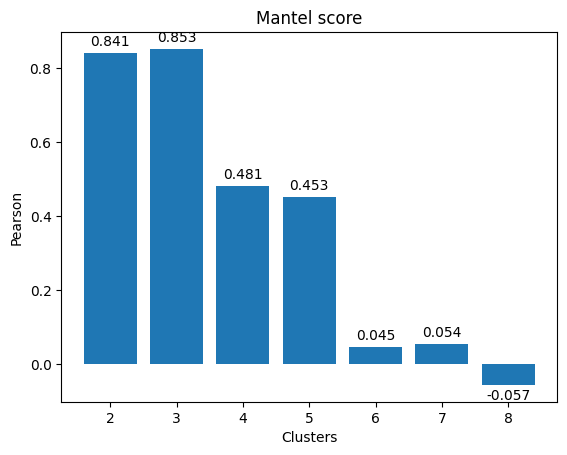

In [40]:
#df_prec = pd.read_csv('Data.csv', sep=';')
fig, ax = plt.subplots()
rects=ax.bar(df_mantel['Num_clusters'],round(df_mantel['mantel'],3), width=0.8)
ax.bar_label(rects, padding=3)
ax.set_ylabel('Pearson')
ax.set_xlabel('Clusters')
ax.set_title('Mantel score')
plt.savefig(os.path.join(results_folder, 'mantel.jpg'))

plt.show()